$s_k = \varepsilon_{k+1} -\varepsilon_k$

$r(k) = \frac{{\rm min}(s_k, s_{k+1})}{{\rm max}(s_k, s_{k+1})}$

In [1]:
%run "C:\Users\Nick\Projects\thermalization_sim\v5_resubmission\SYK2_thermalizer.py" 

In [2]:
import numpy as np
import matplotlib.pyplot  as  plt
from numpy.linalg import eig
from numpy.linalg import eigvalsh

In [3]:
Jc = 1

In [4]:
num = 4 
nr = 100 
coupling_consts_QC = np.load('data/couplings_QC_N={}_nr={}_J={}.npy'.format(num, nr, Jc), allow_pickle = True)

In [5]:
num = 4 
sp_levs4 = np.load('data/sp_levels_N={}.npy'.format(num), allow_pickle = True)
energ4 = np.load('data/energ_N={}.npy'.format(num),allow_pickle = True)

In [6]:
def gap_ratio(num, nr, sp_levs, coupling_consts):
    a = 1.
    n = num
    mb_levels = [] * nr
    ss = [] * nr
    rs = [] * nr
    r_len = 2 ** n - 2

    for j in range(nr):
        H_mat =H_0(n, sp_levs) + a * H_SYK2(n, coupling_consts[j])
        #for i1 in range(2 ** n):
        #        for i2 in range(2 ** n):
        #            if H_mat[i1][i2] - np.conjugate(H_mat[i2][i1]) != 0.:
        #                print('Hermicity check fails!') 
        evs = np.sort(eigvalsh(H_mat))
        if n > 4:
            print(j)
        mb_levels.append(evs)
        s_list = []
        for k in range(int(len(evs))-1):
            s_list.append(evs[k+1]-evs[k])       
        ss.append(s_list)
        r_list = []
        for k in range(int(len(s_list))-1):
            r_list.append(min(s_list[k],s_list[k+1])/max(s_list[k],s_list[k+1]))
        rs.append(r_list)    

    data = [] * r_len    
    for k in range(r_len):
        data_list = []
        for j in range(nr):
            data_list.append(rs[j][k])
        data.append(data_list)
        
    np.save('data/data_WD_N={}_nr={}.npy'.format(num, nr), data, allow_pickle = True)    
    
#    return data

In [7]:
gap_ratio(4, 100, sp_levs4, coupling_consts_QC)

In [8]:
num = 4
nr = 100
data4_100 = np.load('data/data_WD_N={}_nr={}.npy'.format(num, nr), allow_pickle = True)

In [24]:
#gap_ratio(10, 1000, sp_levs10, coupling_consts[10, 1000])

In [9]:
num = 10
nr = 1000
data10_1000 = np.load('data/data_WD_N={}_nr={}.npy'.format(num, nr), allow_pickle = True)

In [10]:
def PWD(beta, x):
    if beta == 1:
        Z = 8 / 27
    elif beta == 2:
        Z = 4 * np.pi / np.sqrt(3) / 81 
    elif beta == 4:
        Z = 4 * np.pi / np.sqrt(3) / 729
    else:
        print('wrong beta')
    f = (x + x ** 2) ** beta / (1 + x + x ** 2) ** (1 + 3 * beta / 2) / Z   
    return f 

In [11]:
x = np.linspace(0,1,101)

In [12]:
fparams = {'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.labelsize': 24,
            'axes.titlesize': 18,
            'font.size': 20,
            'legend.fontsize': 16,
           'text.usetex': True,
           'legend.frameon' : False,
           'svg.fonttype': 'path'}

In [13]:
np.mean(data10_1000[657])

np.float64(0.5962661120991198)

In [14]:
num = 10
kk10 = 657
dkk10 = int((2 ** num - 2) * 0.05)
data10_1000_av = data10_1000[kk10-dkk10:kk10+dkk10].flatten()
print(data10_1000[kk10-dkk10:kk10+dkk10].shape)
print(data10_1000_av.shape)
print(np.mean(data10_1000_av))

(102, 1000)
(102000,)
0.599809627340937


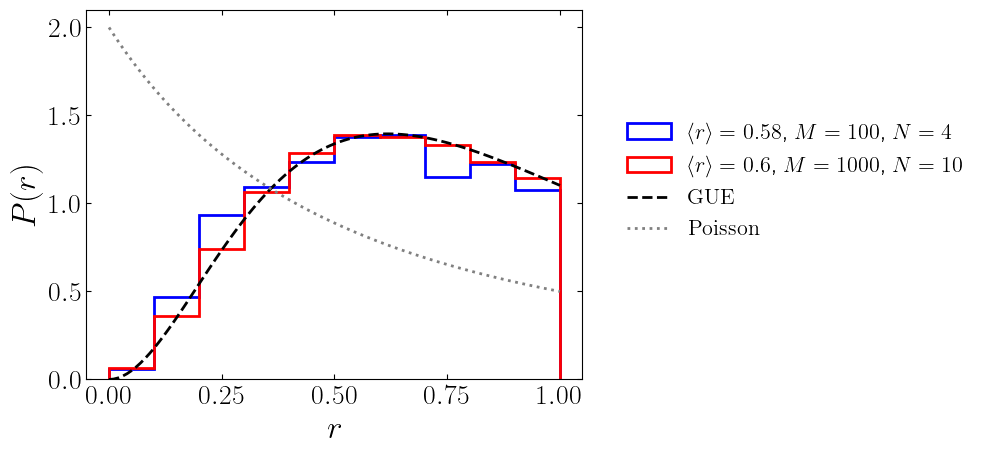

In [15]:
plt.rcParams.update(fparams)

#kk4 = 9
#kk8 = 173
#kk10 = 657
beta = 2

fig = plt.figure()
ax = fig.add_subplot()
#ax.set_title(r'$N={}$'.format(num))
ax.hist(data4_100[2:].flatten(), bins = 10, range=(0, 1), density = True, histtype='step', color ='blue', linewidth = 2.,  
        label = r'$\langle r \rangle={}$, '.format(np.mean(data4_100[2:].flatten()).round(2))+r'$M=100$, '+r'$N=4$')
#ax.hist(data4_1000.flatten(), bins = 10, range=(0, 1), density = True, histtype='step', color = 'red', linewidth = 2.,
#        label = r'$\langle r \rangle={}$, '.format(np.mean(data4_1000.flatten()).round(2))+r'$M=1000$, '+r'$N=4$')
ax.hist(data10_1000_av, bins = 10, range=(0, 1), density = True, histtype='step', color ='red', linewidth = 2.,  
        label = r'$\langle r \rangle={}$, '.format(np.mean(data10_1000_av).round(2))+r'$M=1000$, '+r'$N=10$')
ax.plot(x, 2 * PWD(beta, x), '--', color ='k', linewidth = 2., label=r'$\rm GUE$')
ax.plot(x, 2 / (1 + x) ** 2, ':', color ='gray', linewidth = 2., label=r'$\rm Poisson$')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$P(r)$')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#ax.set_yticks(np.arange(0, 3.5, 0.5))
ax.legend(bbox_to_anchor=(1.05, 0.75), handlelength = 1.95)
#ax.legend(handlelength = 1.95)
#plt.savefig('figs/fig_PWD_v2.svg', bbox_inches="tight", pad_inches = 0)
plt.show()